### 비트 코인 가격 예측 (Deep Learning)
https://www.blockchain.com/explorer/charts/market-price

- auto_arima를 사용하여 적합한 모델을 찾고, 이를 통해 금융 데이터 포트폴리오를 제작한다.

In [1]:
import pandas as pd
import json

# with문을 통해 json 데이터 불러오기 (with문은 자동 close 진행)
# 시계열 데이터는 시작과 끝이 파일명에 있어야 함
with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

# 필요한 특정 데이터 list를 가져와 데이터 프레임으로 변환
bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [2]:
from datetime import datetime

# 날짜 형변환 함수 선언
def changeDate(milis):
    # 초로 변경
    timestamp = milis / 1000
    # 앞에 있는 초를 뒤 포맷 형식으로 변환
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [3]:
# 날짜 형변환 함수를 사용하여 데이터 형변환 진행
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [4]:
# 특정 컬럼을 인덱스로 세팅
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [5]:
# 데이터 정보 출력
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [6]:
# index의 형식을 DatetimeIndex 형식으로 변환
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


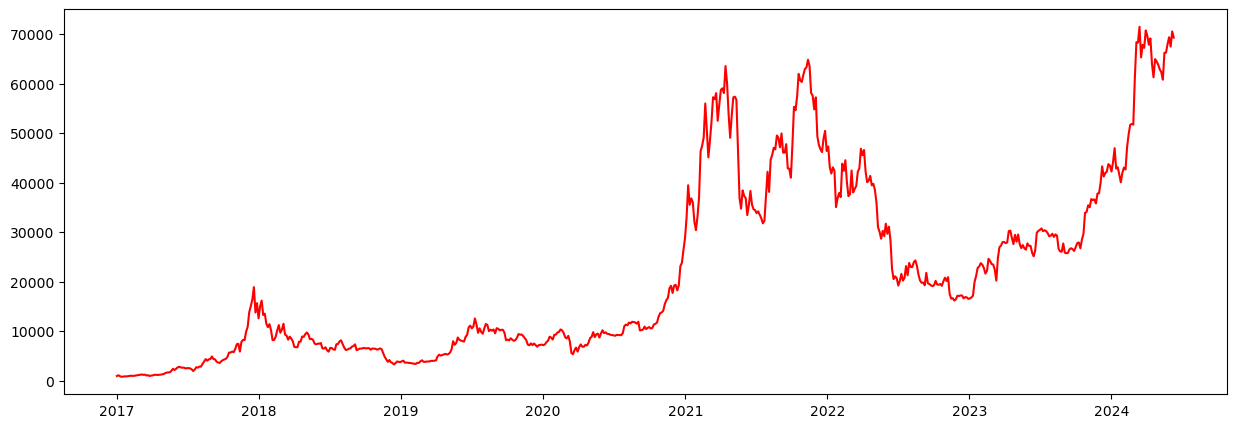

In [7]:
import matplotlib.pyplot as plt

# 그래프 사이즈 지정
plt.figure(figsize=(15, 5))

# 특정 구간의 데이터를 시각화
plt.plot(bitcoin_df['2017-01-01':], c='red')
plt.show()

In [8]:
# 특정 구간 데이터만 추출
bitcoin_df = bitcoin_df['2022-01-01':]
bitcoin_df

,y
x,
2022-01-03,47327.87
2022-01-07,43120.63
2022-01-11,41849.00
2022-01-15,43099.37
2022-01-19,42381.48
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [9]:
# 인덱스 초기화
# 시계열 딥러닝은 DatetimeIndex를 사용하지 않는다.
pre_b_df = bitcoin_df.reset_index()
pre_b_df

,x,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [10]:
# 데이터 세트 컬럼명 변경
pre_b_df = pre_b_df.rename(columns={'x': 'ds'})
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [11]:
# # prophet는 Facebook에서 개발한 시계열 데이터 예측 라이브러리, 사업 예측 및 성장 예측에 강점
# pip install prophet

In [12]:
from prophet import Prophet

# 생성자 호출 및 훈련 진행
model = Prophet().fit(pre_b_df)

18:46:09 - cmdstanpy - INFO - Chain [1] start processing
18:46:09 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Prophet 모델을 사용하여 미래의 예측값을 생성한다.
# make_future_dataframe: 미래의 일정한 기간에 해당하는 날짜를 포함하는 DataFrame 생성
future = model.make_future_dataframe(periods=365)

# 예측
# 미래의 날짜 정보가 포함된 future DataFrame 사용
forecast = model.predict(future)

# 예측 결과 중 특정 컬럼 추출하여 출력
# ds: 날짜, yhat: 해당 날짜의 예측값, yhat_lower: 예측값 하한, yhat_upper: 예측값 상한
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][680:]

,ds,yhat,yhat_lower,yhat_upper


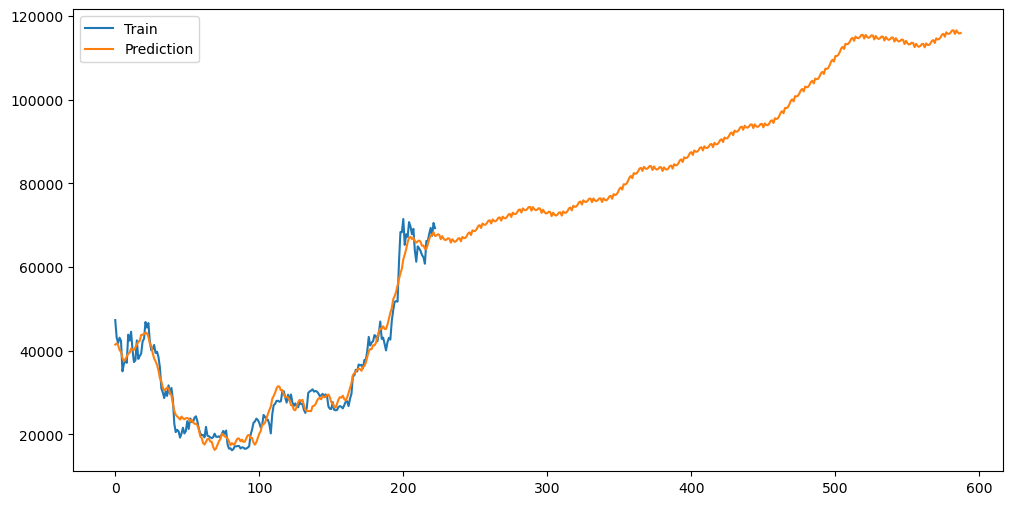

In [14]:
import matplotlib.pyplot as plt

# 그래프 사이즈 지정
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 훈련 데이터
plt.plot(pre_b_df[['y']], label='Train')
# 예측 데이터
plt.plot(forecast[['yhat']], label='Prediction')

plt.legend()
plt.show()

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


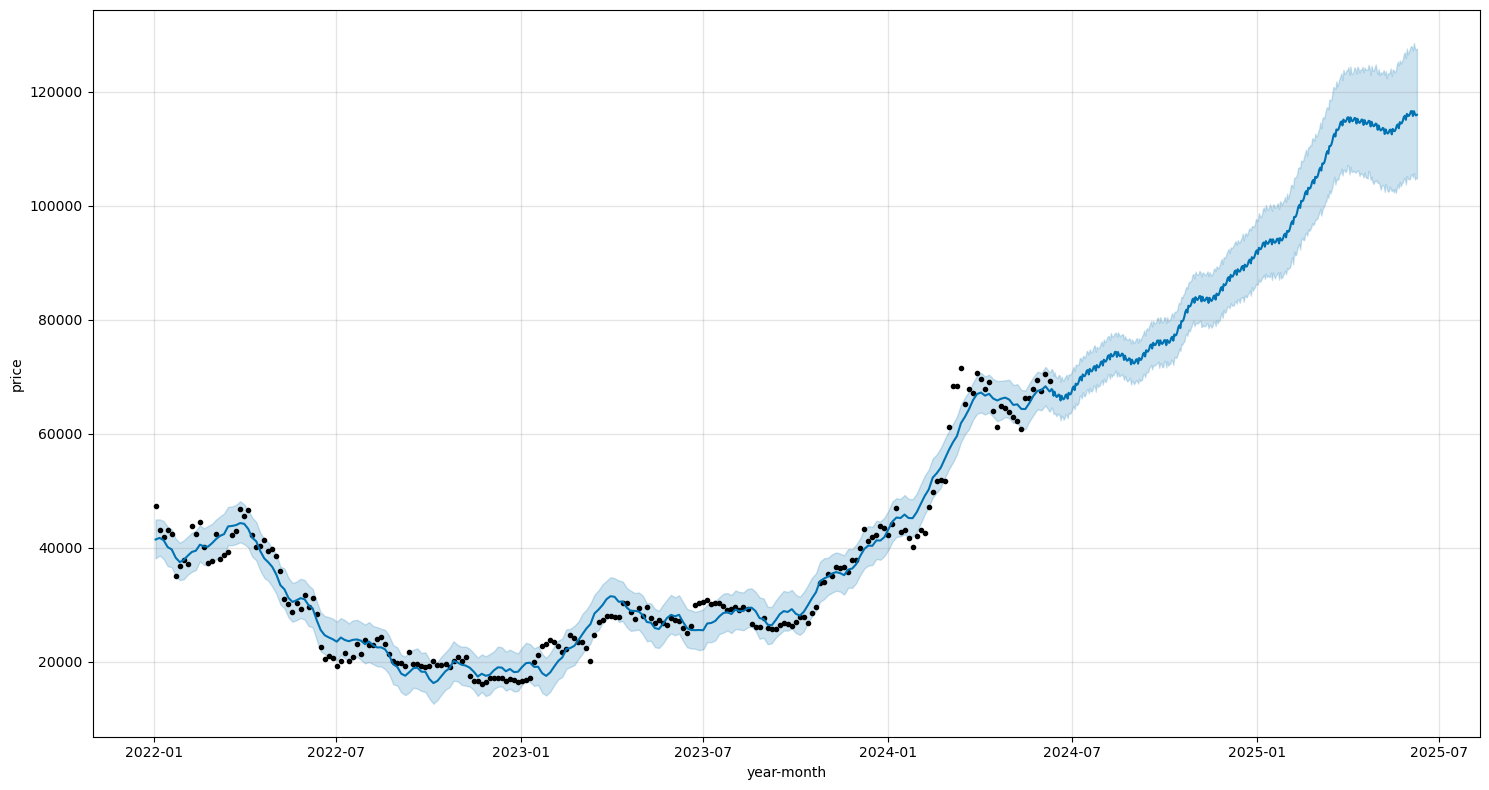

In [15]:
# 예측 결과 데이터 프레임의 정보로 시각화
# 예측값, 데이터 신뢰구간, 날짜 등..
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')

plt.show()

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

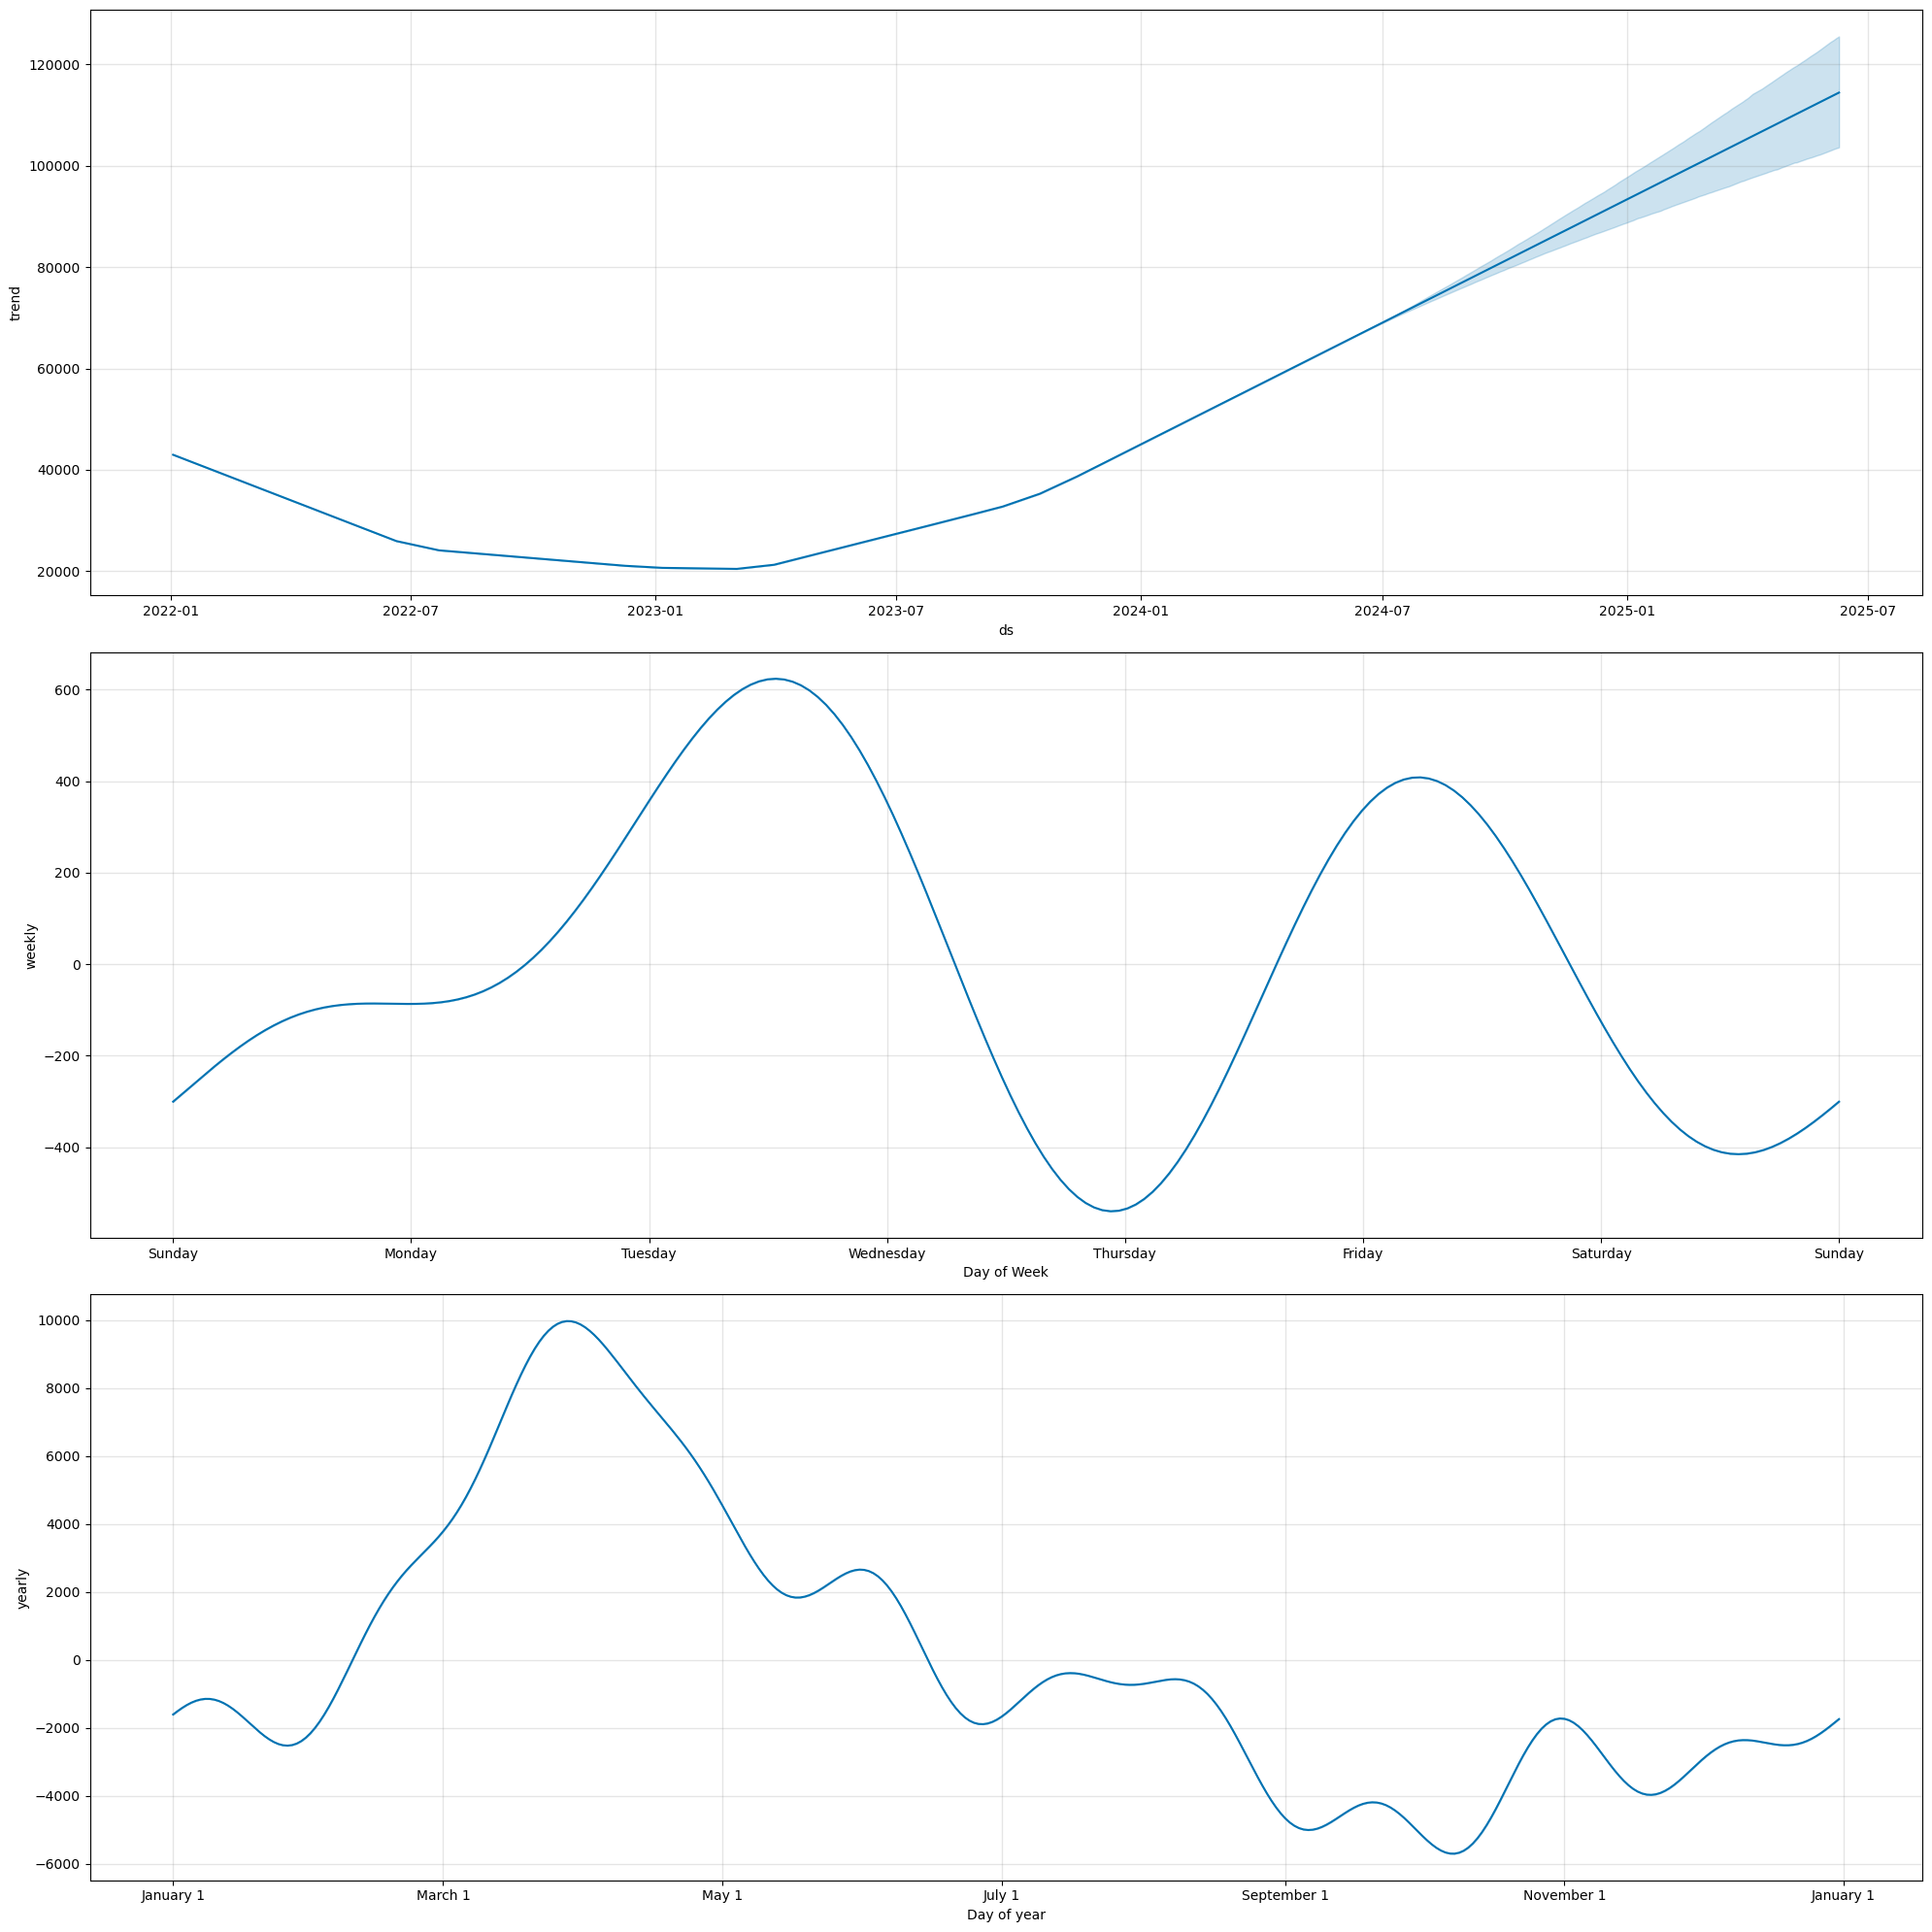

In [16]:
# plot_components(): Prophet 모델의 구성 요소를 시각화
# 트렌드(추세), 연간 계절성, 주간 계절성 출력
model.plot_components(forecast, figsize=(20, 20))
plt.show()

RNN = R = 순환
방금 꺼 가져와서 핏하고 프리딕트하고 순환...
RNN 시작 > 단기 기억 바로 전꺼만 기억하고 이전거 기억 못함....
긴 기간을 기억할 수 있는 LSTM 장기 필요 ...

#### TIP!
RNN(Recurrent Neural Network)은 신경망 모델 중 하나로, 순환적인 구조를 가진다.  
이전의 출력을 현재의 입력과 함께 고려하여 작업을 수행하는 데에 유용하다.  
하지만 RNN은 시간에 따른 정보를 잘 기억하지 못하는 단점이 있다(단기 기억).  
이전의 정보를 길게 기억하기 어려운 문제를 해결하기 위해 LSTM(Long Short-Term Memory)이 필요하다.

### Prophet 심화

In [17]:
# 원본 데이터 세트 출력
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [18]:
# 상위 80% 데이터 훈련 데이터로 추출 
train_df = pre_b_df.iloc[:int(len(pre_b_df) * 0.8)]
train_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
173,2023-11-26,37800.94
174,2023-11-30,37867.37
175,2023-12-04,39976.04
176,2023-12-08,43298.70


In [19]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# 파라미터 값 지정
# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default (10.0 이상은 비추천)
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
# additive: 더하기, multiplicative: 곱하기
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
# *unpacking으로 값을 풀어 가져오고 zip을 사여 key와 묶어 dict 형식으로 저장  
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

# 전체 데이터 80% 개수 저장
train_len = int(len(pre_b_df) * 0.8)
# 전체 데이터 20% 개수 저장
test_len = int(len(pre_b_df) * 0.2)

# 훈련 사이즈 지정
train_size = f'{train_len} days'
# 테스트 사이즈 지정
test_size = f'{test_len} days'
# 훈련 데이터 세트 분리 (상위 80%)
train_df = pre_b_df.iloc[: train_len]
# 테스트 데이터 세트 분리 (하위 20%)
test_df = pre_b_df.iloc[train_len: ]

# 평균 절대 백분율 오차(MAPE) 저장하기 위해 초기 list 생성
mapes = []

for param in param_combinded:
    # 파라미터 값이 dict 형식이기 때문에 unpacking하여 Prophet 모델에 전달
    model = Prophet(**param)
    # 훈련
    model.fit(train_df)

    # cross_validation
    # initial=초기 학습 기간, period=교차 검증을 수행할 각 반복의 기간, horizon=예측할 기간, parallel=병렬 처리를 사용하여 교차 검증 수행 여부
    # parallel 옵션은 아래와 같다.
    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    # 교차 검증 결과를 평가
    # performance_metrics(교차 검증을 수행한 후 얻은 데이터프레임, rolling_window=이동 평균 계산)
    df_p = performance_metrics(cv_df, rolling_window=1)
    # 데이터 프레임에서 mape 값을 추출하여 list에 저장
    # mape이 제일 낮은게 우리 가 사용해야할 파라미터 값이 된다.
    mapes.append(df_p['mape'].values[0])

# 매개변수 조합을 포함하는 데이터프레임 생성
tuning_result = pd.DataFrame(param_combinded)
# 평균 절대 백분율 오차(MAPE) 값을 컬럼으로 추가
tuning_result['mape'] = mapes

18:46:10 - cmdstanpy - INFO - Chain [1] start processing
18:46:10 - cmdstanpy - INFO - Chain [1] done processing
18:46:14 - cmdstanpy - INFO - Chain [1] start processing
18:46:14 - cmdstanpy - INFO - Chain [1] done processing
18:46:18 - cmdstanpy - INFO - Chain [1] start processing
18:46:18 - cmdstanpy - INFO - Chain [1] done processing
18:46:22 - cmdstanpy - INFO - Chain [1] start processing
18:46:22 - cmdstanpy - INFO - Chain [1] done processing
18:46:26 - cmdstanpy - INFO - Chain [1] start processing
18:46:27 - cmdstanpy - INFO - Chain [1] done processing
18:46:31 - cmdstanpy - INFO - Chain [1] start processing
18:46:31 - cmdstanpy - INFO - Chain [1] done processing
18:46:35 - cmdstanpy - INFO - Chain [1] start processing
18:46:35 - cmdstanpy - INFO - Chain [1] done processing
18:46:39 - cmdstanpy - INFO - Chain [1] start processing
18:46:39 - cmdstanpy - INFO - Chain [1] done processing
18:46:43 - cmdstanpy - INFO - Chain [1] start processing
18:46:44 - cmdstanpy - INFO - Chain [1]

In [20]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
19,0.50,0.10,multiplicative,0.143376
17,0.50,0.05,multiplicative,0.143557
21,0.50,1.00,multiplicative,0.143878
23,0.50,10.00,multiplicative,0.143935
18,0.50,0.10,additive,0.144873
33,5.00,0.05,multiplicative,0.144967
41,10.00,0.05,multiplicative,0.145168
35,5.00,0.10,multiplicative,0.145253
39,5.00,10.00,multiplicative,0.145380
43,10.00,0.10,multiplicative,0.145405


In [21]:
# loss 값이 제일 낮은 파라미터 값 가져와서 담기 
# 최적의 모델!
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='multiplicative')

model.fit(pre_b_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

18:49:55 - cmdstanpy - INFO - Chain [1] start processing
18:49:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2024-06-05,70045.865297,67455.554187,72512.940983
222,2024-06-09,67502.869742,64903.854222,69857.992823
223,2024-06-10,67602.329721,64921.528592,70130.054206
224,2024-06-11,69008.227334,66610.710061,71342.399304
225,2024-06-12,68681.306292,66276.710988,71055.623075
...,...,...,...,...
583,2025-06-05,125823.856555,63913.124516,186106.512445
584,2025-06-06,129113.355299,65228.703454,191291.493868
585,2025-06-07,127408.280463,63443.576446,189637.080697
586,2025-06-08,125298.219561,62890.513373,186673.024217


In [22]:
# 데이터 프레임 복제
b_df = pre_b_df.copy()
# 특정 컬럼을 인덱스로 지정
b_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

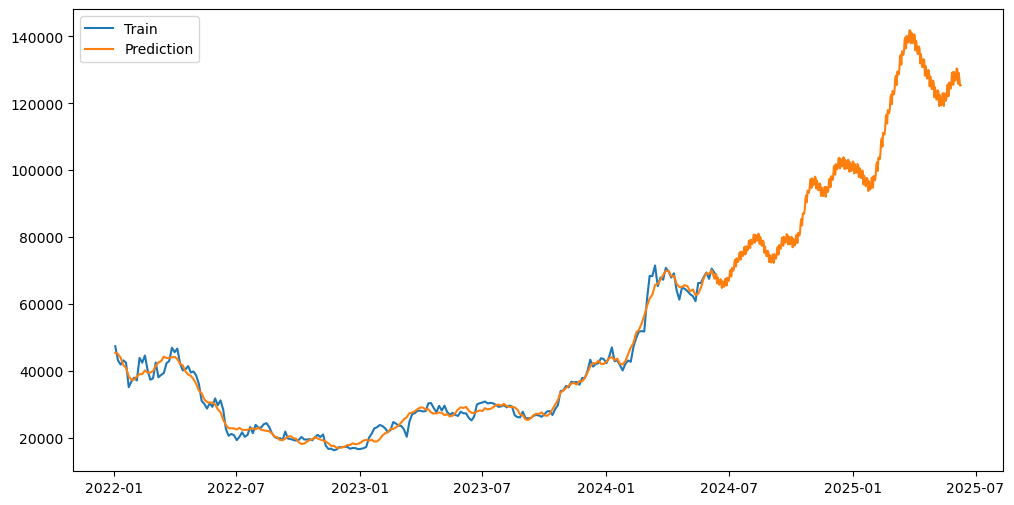

In [23]:
# 그래프 사이즈 지정
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 훈련 데이터
plt.plot(b_df[['y']], label='Train')
# 예측 데이터
plt.plot(forecast_df[['yhat']], label='Prediction')

plt.legend()
plt.show()

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


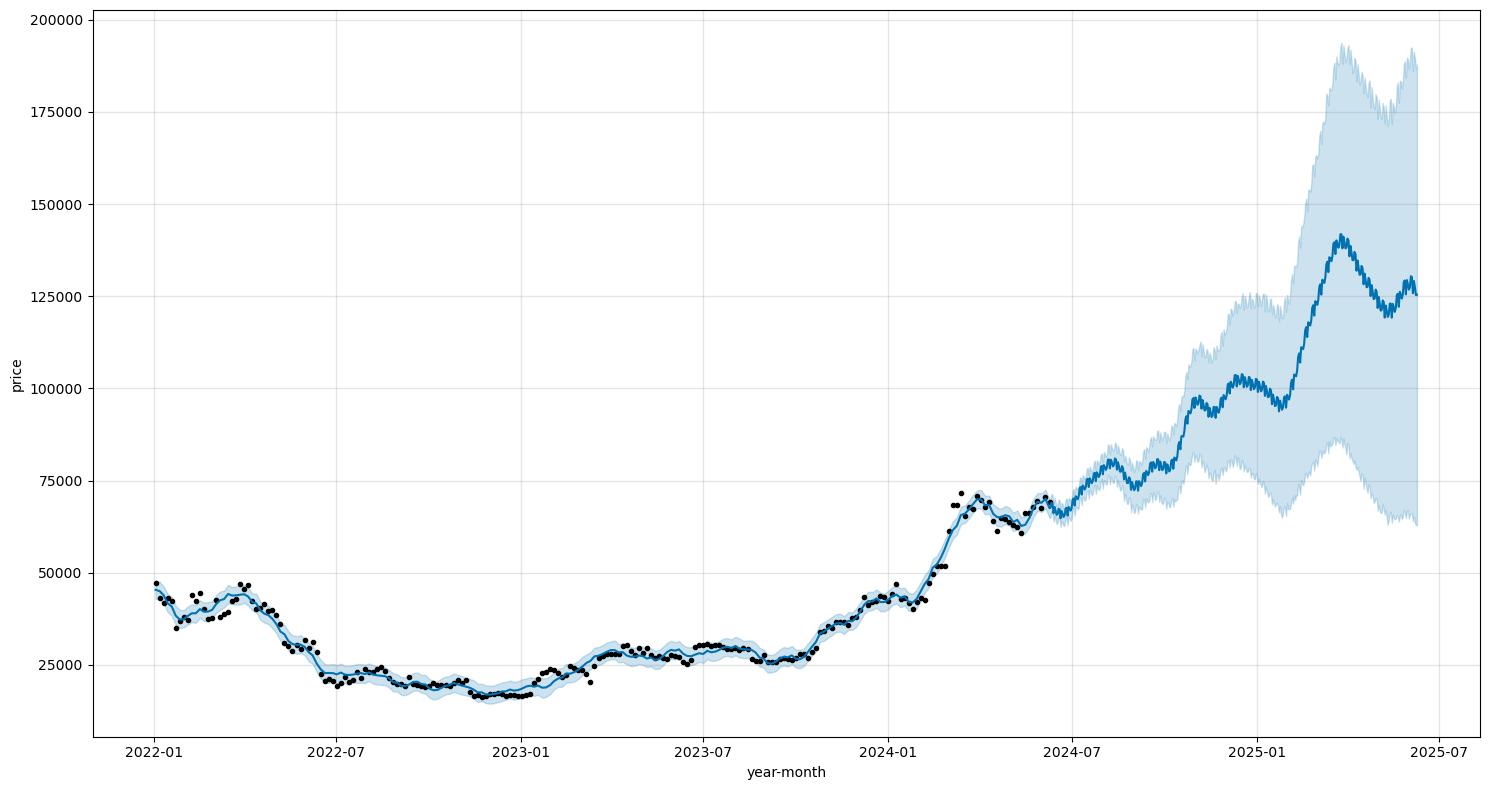

In [24]:
# 예측 결과 데이터 프레임의 정보로 시각화
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')

plt.show()

C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\LEGION\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

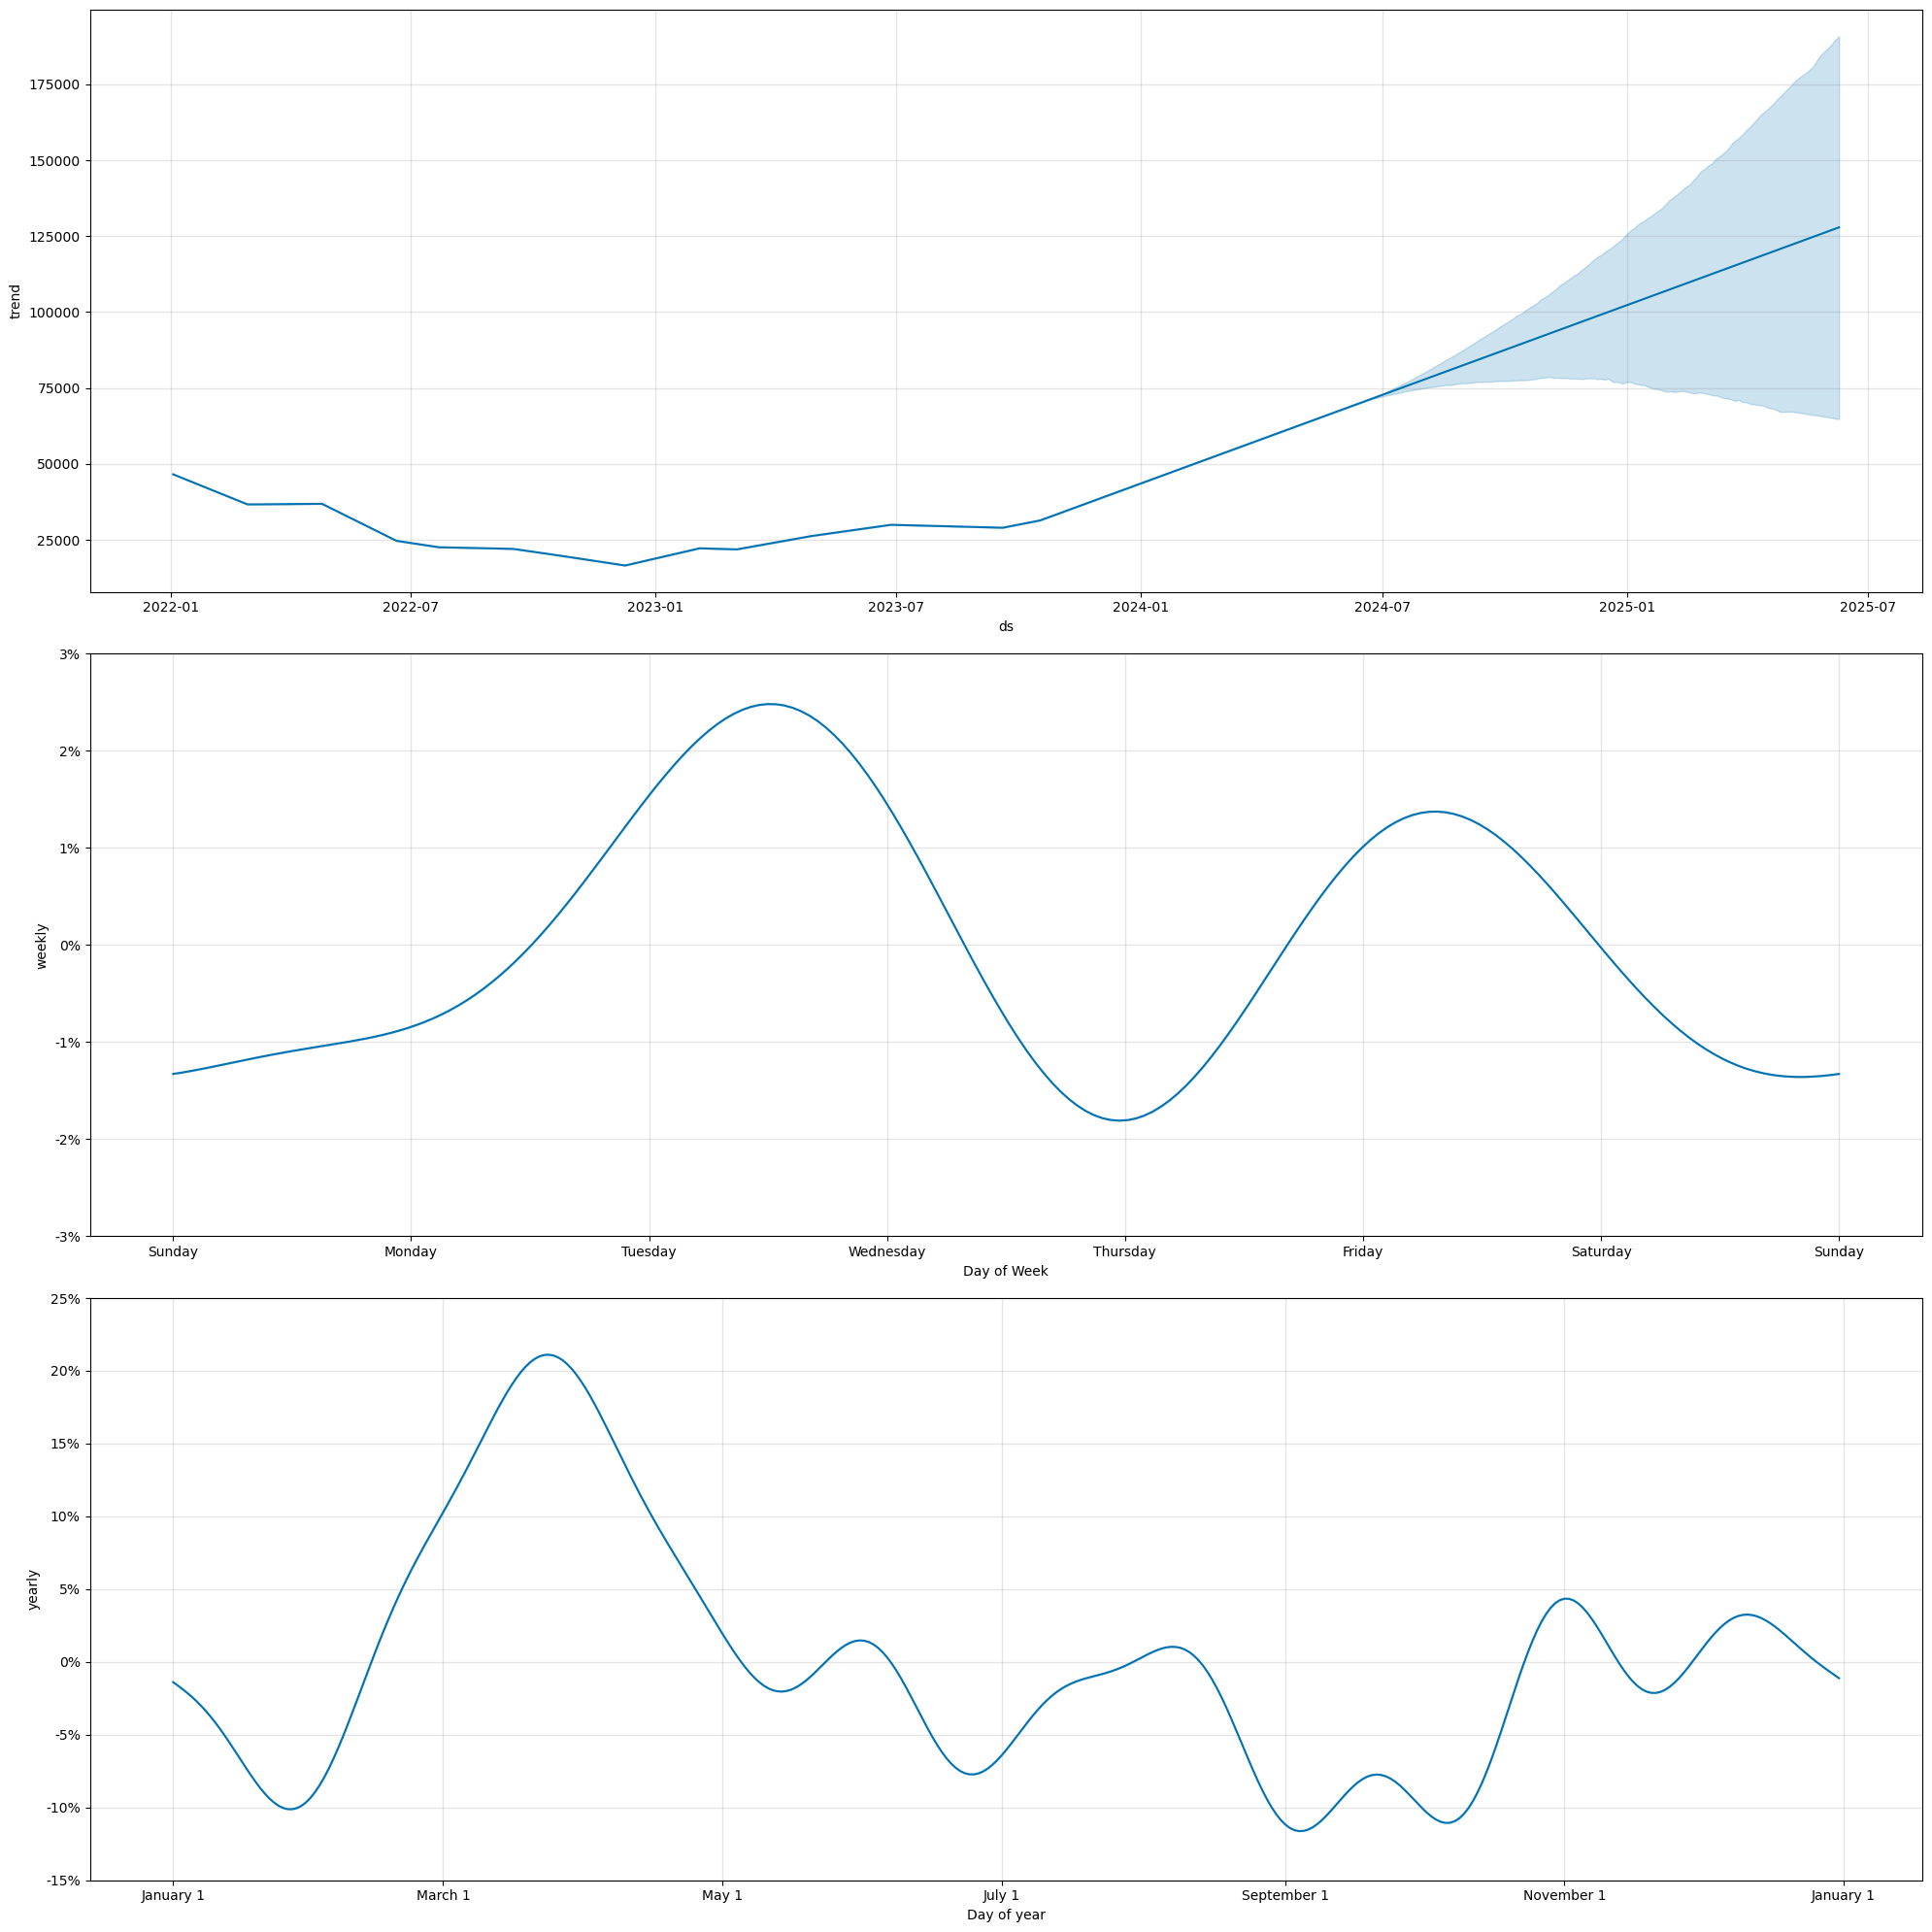

In [25]:
# plot_components(): Prophet 모델의 구성 요소를 시각화
model.plot_components(forecast, figsize=(20, 20))

plt.show()